In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Load and inspect data
df = pd.read_csv('movie_metadata.csv')
df.head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000


In [3]:
# Drop negligible columns
df.drop('color', axis=1, inplace=True)
df.drop('facenumber_in_poster', axis=1, inplace=True)
df.drop('plot_keywords', axis=1, inplace=True)
df.drop('movie_imdb_link', axis=1, inplace=True)
df.drop('language', axis=1, inplace=True)
df.drop('country', axis=1, inplace=True)
df.drop('aspect_ratio', axis=1, inplace=True)
df.head(1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,886204,4834,Wes Studi,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,33000


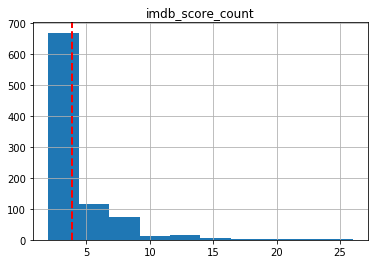

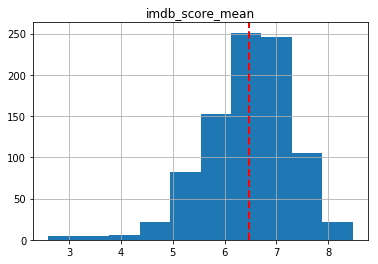

In [4]:
# Experiment 1: Take a look at "best" directors
df_director = df.loc[:, ['director_name', 'imdb_score']] \
    .groupby('director_name') \
    .agg(['mean', 'std', 'count'])
df_director.columns = df_director.columns.to_series().apply(lambda x: '_'.join(x))
df_director = df_director.query('imdb_score_count > 1')
plt.figure()
df_director.hist(column='imdb_score_count')
plt.axvline(df_director['imdb_score_count'].mean(), color='r', linestyle='dashed', linewidth=2)
df_director.hist(column='imdb_score_mean')
plt.axvline(df_director['imdb_score_mean'].mean(), color='r', linestyle='dashed', linewidth=2)

In [5]:
df_director['quality_score'] = df_director['imdb_score_mean'] * (1 - df_director['imdb_score_std']) * df_director['imdb_score_count']
df_director.sort_values('quality_score', ascending=False).head(10)

,imdb_score_mean,imdb_score_std,imdb_score_count,quality_score
director_name,,,,
Woody Allen,7.009091,0.529068,22,72.617646
Martin Scorsese,7.660000,0.602975,20,60.824218
Steven Spielberg,7.480769,0.742977,26,49.990900
Clint Eastwood,7.225000,0.701033,20,43.200721
Michael Bay,6.638462,0.520478,13,41.382741
Brett Ratner,6.410000,0.398469,10,38.558118
Quentin Tarantino,8.200000,0.424264,8,37.768277
Phillip Noyce,6.766667,0.390512,9,37.117790
Richard Donner,6.825000,0.556164,12,36.350184
